In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `d:\Gits\YardSale.jl\benchmark`


In [2]:
using YardSale
using BenchmarkTools
using Graphs

# First benchmark: ODEs

In [3]:
# TODO

# Second benchmark : EYSM base

In [4]:
# TODO

# Third benchmark: every interaction and taxation mode over a single network

In [5]:
# Instantiate a benchmark group
suite = BenchmarkGroup()

# Graph parameters
N = 128
k = 8
p = k/(N-1)
g = erdos_renyi(N, p, seed=42)
# Simulation parameters
W_N = 1.0f0
chi = 1.0f0
zeta = 1.0f0
f = 0.01
steps = 10000 * N
seed = 42


interaction_modes = ["A", "B"]
taxation_modes = ["A", "B"]

# Add benchmarks
suite["IM_TM"] = BenchmarkGroup()

# Add some benchmarks to the "IM_TM" group
for im in interaction_modes
    for tm in taxation_modes
        suite["IM_TM"]["$im,$tm"] = @benchmarkable EYSM_net_full($g, $W_N, $im, $tm, $chi, $zeta, $f, $steps, $seed)
    end
end
# Execute `tune!` to find the optimal sample configuration for each benchmark
tune!(suite)

1-element BenchmarkTools.BenchmarkGroup:
  tags: []
  "IM_TM" => 4-element BenchmarkTools.BenchmarkGroup:
	  tags: []
	  "B,A" => Benchmark(evals=1, seconds=5.0, samples=10000)
	  "B,B" => Benchmark(evals=1, seconds=5.0, samples=10000)
	  "A,B" => Benchmark(evals=1, seconds=5.0, samples=10000)
	  "A,A" => Benchmark(evals=1, seconds=5.0, samples=10000)

In [6]:
t = run(suite, verbose=true)

(1/1) benchmarking "IM_TM"...
  (1/4) benchmarking "B,A"...
  done (took 39.3113315 seconds)
  (2/4) benchmarking "B,B"...
  done (took 42.8950559 seconds)
  (3/4) benchmarking "A,B"...
  done (took 40.5551666 seconds)
  (4/4) benchmarking "A,A"...
  done (took 35.9107177 seconds)
done (took 160.5976204 seconds)


1-element BenchmarkTools.BenchmarkGroup:
  tags: []
  "IM_TM" => 4-element BenchmarkTools.BenchmarkGroup:
	  tags: []
	  "B,A" => Trial(18.739 s)
	  "B,B" => Trial(20.953 s)
	  "A,B" => Trial(19.299 s)
	  "A,A" => Trial(17.026 s)

In [14]:
dump(t["IM_TM"]["B,B"])

BenchmarkTools.Trial
  params: BenchmarkTools.Parameters
    seconds: Float64 5.0
    samples: Int64 10000
    evals: Int64 1
    evals_set: Bool false
    overhead: Float64 0.0
    gctrial: Bool true
    gcsample: Bool false
    time_tolerance: Float64 0.05
    memory_tolerance: Float64 0.01
  times: Array{Float64}((1,)) [2.09533803e10]
  gctimes: Array{Float64}((1,)) [7.537067e8]
  memory: Int64 5577454768
  allocs: Int64 9010025


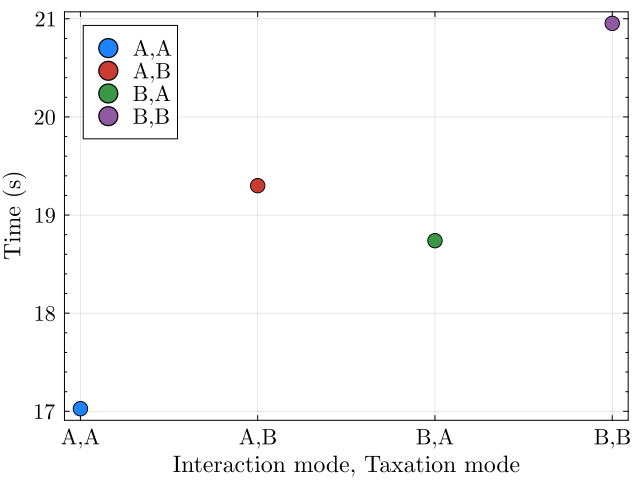

In [ ]:
# Plot the results
im_tm = ["A,A", "A,B", "B,A", "B,B"]
using Plots
p = plot(palette=:julia, yminorticks=true,tickfontsize=14,labelfontsize=15,framestyle=:box,
legendfontsize=14,size=(640,480),fontfamily="Computer Modern")
for (i,imtm) in enumerate(im_tm)
    p = scatter!(p,[i],[t["IM_TM"][imtm].times[1]/1e9], label=imtm, ms=8)
end

xticks!(1:4, im_tm)
ylabel!("Time (s)")
xlabel!("Interaction mode, Taxation mode")

display(p)
savefig(p, "benchmark_IM_TM_secondversion.png")